In [5]:
import pandas as pd
import numpy as np
import os

all_files = os.listdir('.')
txt_files = [file for file in all_files if file.endswith('.txt')]

for file_path in txt_files:
    content = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("Warning!"):
                break
            else:
                 line = line.split()
                 content.append(line)
    
    df = pd.DataFrame(content[1:], columns=content[0]).drop(columns='#type')
    df.to_csv(file_path.replace(".txt",".csv"), index=False)
    print(df.shape)

(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)
(11, 17)


In [23]:
all_files = os.listdir('.')
csv_files = [file for file in all_files if file.endswith('.csv')]

configurations = list(set([csv_files[i][:-7] for i in range(len(csv_files))]))
print(configurations)

config_data_dict = {}

for configuration in configurations:
    df = pd.DataFrame(columns = ["target"])
    for file_index in [i for i in range(len(csv_files)) if csv_files[i].startswith(configuration)]:
        fields = ["QPS","p95", "target"]
        df = pd.merge( left = df, right = pd.read_csv(csv_files[file_index], usecols=fields), on = "target", how = "right")
    
    df.reset_index(drop=True, inplace=True)
    df["QPS_avg"] = (df["QPS"] + df["QPS_x"] + df["QPS_y"])/3
    df["p95_avg"] = (df["p95"] + df["p95_x"] + df["p95_y"])/3000

    # Calculate the standard deviation for p95 observations
    df["p95_std"] = df[["p95", "p95_x", "p95_y"]].std(axis=1)

    # Calculate the standard deviation for QPS observations
    df["QPS_std"] = df[["QPS", "QPS_x", "QPS_y"]].std(axis=1)
    
    # If you prefer to use the Standard Error of the Mean (SEM) as your error bars
    df["p95_sem"] = df["p95_std"] / (1000*np.sqrt(3))
        
    # If you prefer to use the Standard Error of the Mean (SEM) as your error bars
    df["QPS_sem"] = df["QPS_std"] / (np.sqrt(3))

    config_data_dict[configuration] = df[["target", "QPS_avg", "p95_avg", "p95_sem", "QPS_sem"]]

['ibench-l2', 'ibench-llc', 'ibench-cpu', 'ibench-l1d', 'no-benchmark', 'ibench-l1i', 'ibench-membw']


In [24]:
config_data_dict['no-benchmark']

,target,QPS_avg,p95_avg,p95_sem,QPS_sem
0,5000,5027.733333,0.536633,0.004831,17.638342
1,10000,9943.600000,0.703933,0.004763,20.240883
2,15000,14948.333333,0.856067,0.002413,41.403757
3,20000,19970.933333,0.973900,0.008021,55.369587
4,25000,24943.200000,1.057233,0.007672,76.317844
5,30000,30065.000000,1.125167,0.008158,67.084723
6,35000,34976.600000,1.144233,0.027507,47.870798
7,40000,39938.466667,1.150367,0.010444,75.348288
8,45000,45020.933333,1.183900,0.011575,118.824539
9,50000,49787.166667,1.592233,0.293104,259.024222


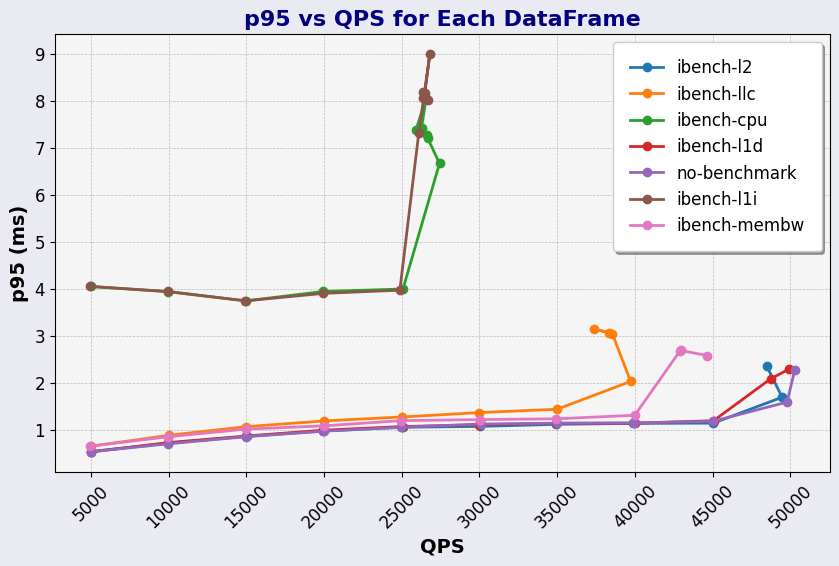

In [12]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# # Assuming dataframes_dict is your dictionary containing DataFrames
# # Each DataFrame has two columns: "p95" and "QPS"

# # Customize plot size and font options
# plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

# # Create a figure and an axis for plotting
# fig, ax = plt.subplots()

# # Customize the plot background
# ax.set_facecolor('#F5F5F5')
# fig.patch.set_facecolor('#EAEAF2')

# # Iterate over the dictionary to plot each DataFrame
# for name, df in config_data_dict.items():
#     # Plot with "QPS" on the x-axis and "p95" on the y-axis
#     ax.plot(df["QPS_avg"], df["p95_avg"], label=name, marker='o', linestyle='-', linewidth=2)

# # Set the title and labels with custom font size
# ax.set_title("p95 vs QPS for Each DataFrame", fontsize=16, fontweight='bold', color='navy')
# ax.set_xlabel("QPS", fontsize=14, fontweight='bold')
# ax.set_ylabel("p95 (ms)", fontsize=14, fontweight='bold')

# # Customize axis ticks
# ax.xaxis.set_major_locator(ticker.MaxNLocator(10)) # Set the number of ticks on x-axis
# ax.yaxis.set_major_locator(ticker.MaxNLocator(10)) # Set the number of ticks on y-axis

# # Customize grid
# ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# # Customize the legend 
# ax.legend(frameon=True, framealpha=1, shadow=True, borderpad=1)

# # Customize the tick labels
# ax.tick_params(axis='x', labelsize=12, rotation=45)
# ax.tick_params(axis='y', labelsize=12)

# # Adjust margins and layout
# plt.subplots_adjust(bottom=0.15)

# # Show the plot
# plt.show()

Queries per second (QPS) on the x-axis (the x-axis should range from 0 to 55K).
<br>
(note: the actual achieved QPS, not the target QPS)
<br>
• 95th percentile latency on the y-axis (the y-axis should range from 0 to 8 ms).
<br>
• Label your axes.
<br>
• 7 lines, one for each configuration. Add a legend.
<br>
• State how many runs you averaged across and include error bars at each point in both
dimensions.
<br>
• The readability of your plot will be part of your grade
<br>

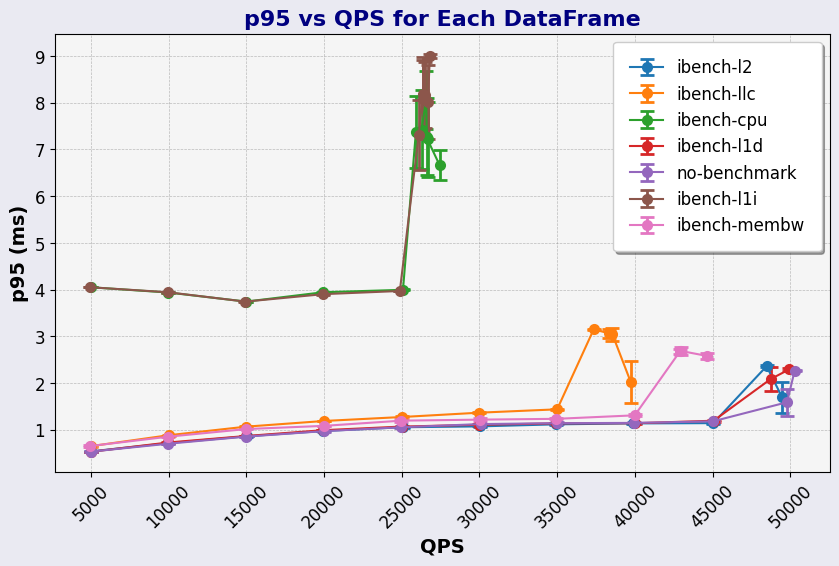

In [13]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})
# fig, ax = plt.subplots()
# ax.set_facecolor('#F5F5F5')
# fig.patch.set_facecolor('#EAEAF2')

# for name, df in config_data_dict.items():
#     # Assuming "Error" column exists with the SEM or standard deviation
#     # Sorting the DataFrame by "QPS" to ensure correct order
#     sorted_df = df.sort_values(by="QPS_avg")
#     ax.errorbar(sorted_df["QPS_avg"], sorted_df["p95_avg"], yerr=sorted_df["p95_sem"], label=name, fmt='-o', capsize=5, elinewidth=2, markeredgewidth=2)

# ax.set_title("p95 vs QPS for Each DataFrame", fontsize=16, fontweight='bold', color='navy')
# ax.set_xlabel("QPS", fontsize=14, fontweight='bold')
# ax.set_ylabel("p95 (ms)", fontsize=14, fontweight='bold')
# ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# ax.legend(frameon=True, framealpha=1, shadow=True, borderpad=1)
# ax.tick_params(axis='x', labelsize=12, rotation=45)
# ax.tick_params(axis='y', labelsize=12)
# plt.subplots_adjust(bottom=0.15)
# plt.show()

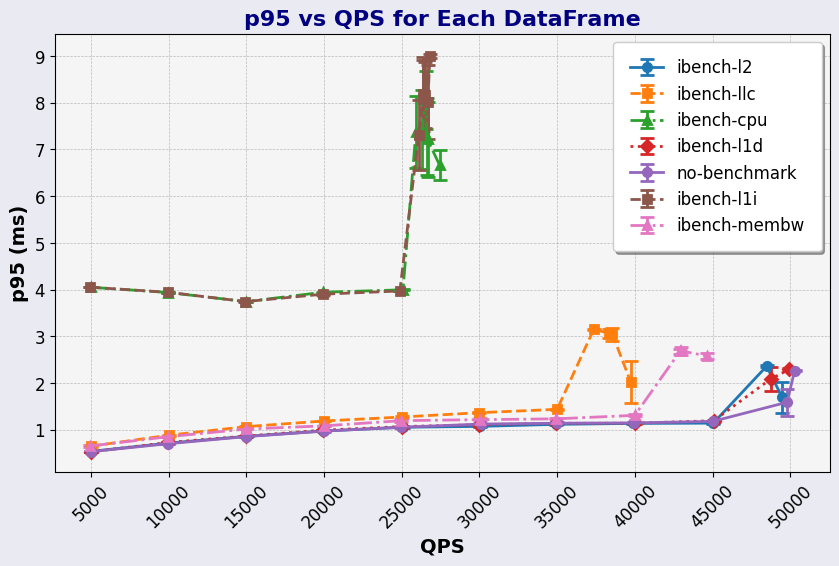

In [15]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# # Enhanced plot aesthetics
# plt.rcParams.update({
#     'font.size': 12,
#     'figure.figsize': (10, 6),
#     'figure.dpi': 100,  # Default DPI
#     'savefig.dpi': 300,  # DPI for saved figures
#     'lines.linewidth': 2,
#     'axes.prop_cycle': plt.cycler('color', plt.cm.tab10.colors)  # Color cycle from tab10 colormap
# })

# fig, ax = plt.subplots()
# ax.set_facecolor('#F5F5F5')
# fig.patch.set_facecolor('#EAEAF2')

# # Define line and marker styles for different data series
# line_styles = ['-', '--', '-.', ':']
# marker_styles = ['o', 's', '^', 'D']

# for i, (name, df) in enumerate(config_data_dict.items()):
#     sorted_df = df.sort_values(by="QPS_avg")
#     line_style = line_styles[i % len(line_styles)]
#     marker_style = marker_styles[i % len(marker_styles)]
#     ax.errorbar(sorted_df["QPS_avg"], sorted_df["p95_avg"], yerr=sorted_df["p95_sem"], label=name, 
#                 fmt=line_style + marker_style, capsize=5, elinewidth=2, markeredgewidth=2)

# ax.set_title("p95 vs QPS for Each DataFrame", fontsize=16, fontweight='bold', color='navy')
# ax.set_xlabel("QPS", fontsize=14, fontweight='bold')
# ax.set_ylabel("p95 (ms)", fontsize=14, fontweight='bold')
# ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(10))
# ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# ax.legend(frameon=True, framealpha=1, shadow=True, borderpad=1, loc='best')
# ax.tick_params(axis='x', labelsize=12, rotation=45)
# ax.tick_params(axis='y', labelsize=12)
# plt.subplots_adjust(bottom=0.15)

# # To save the figure with high quality
# plt.savefig('plot_high_quality.png', dpi=300)

# plt.show()


In [16]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 164.1 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 164.1 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/294.9 kB 252.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 252.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 240.7 kB/s eta 0:00:01
   --------------- -------

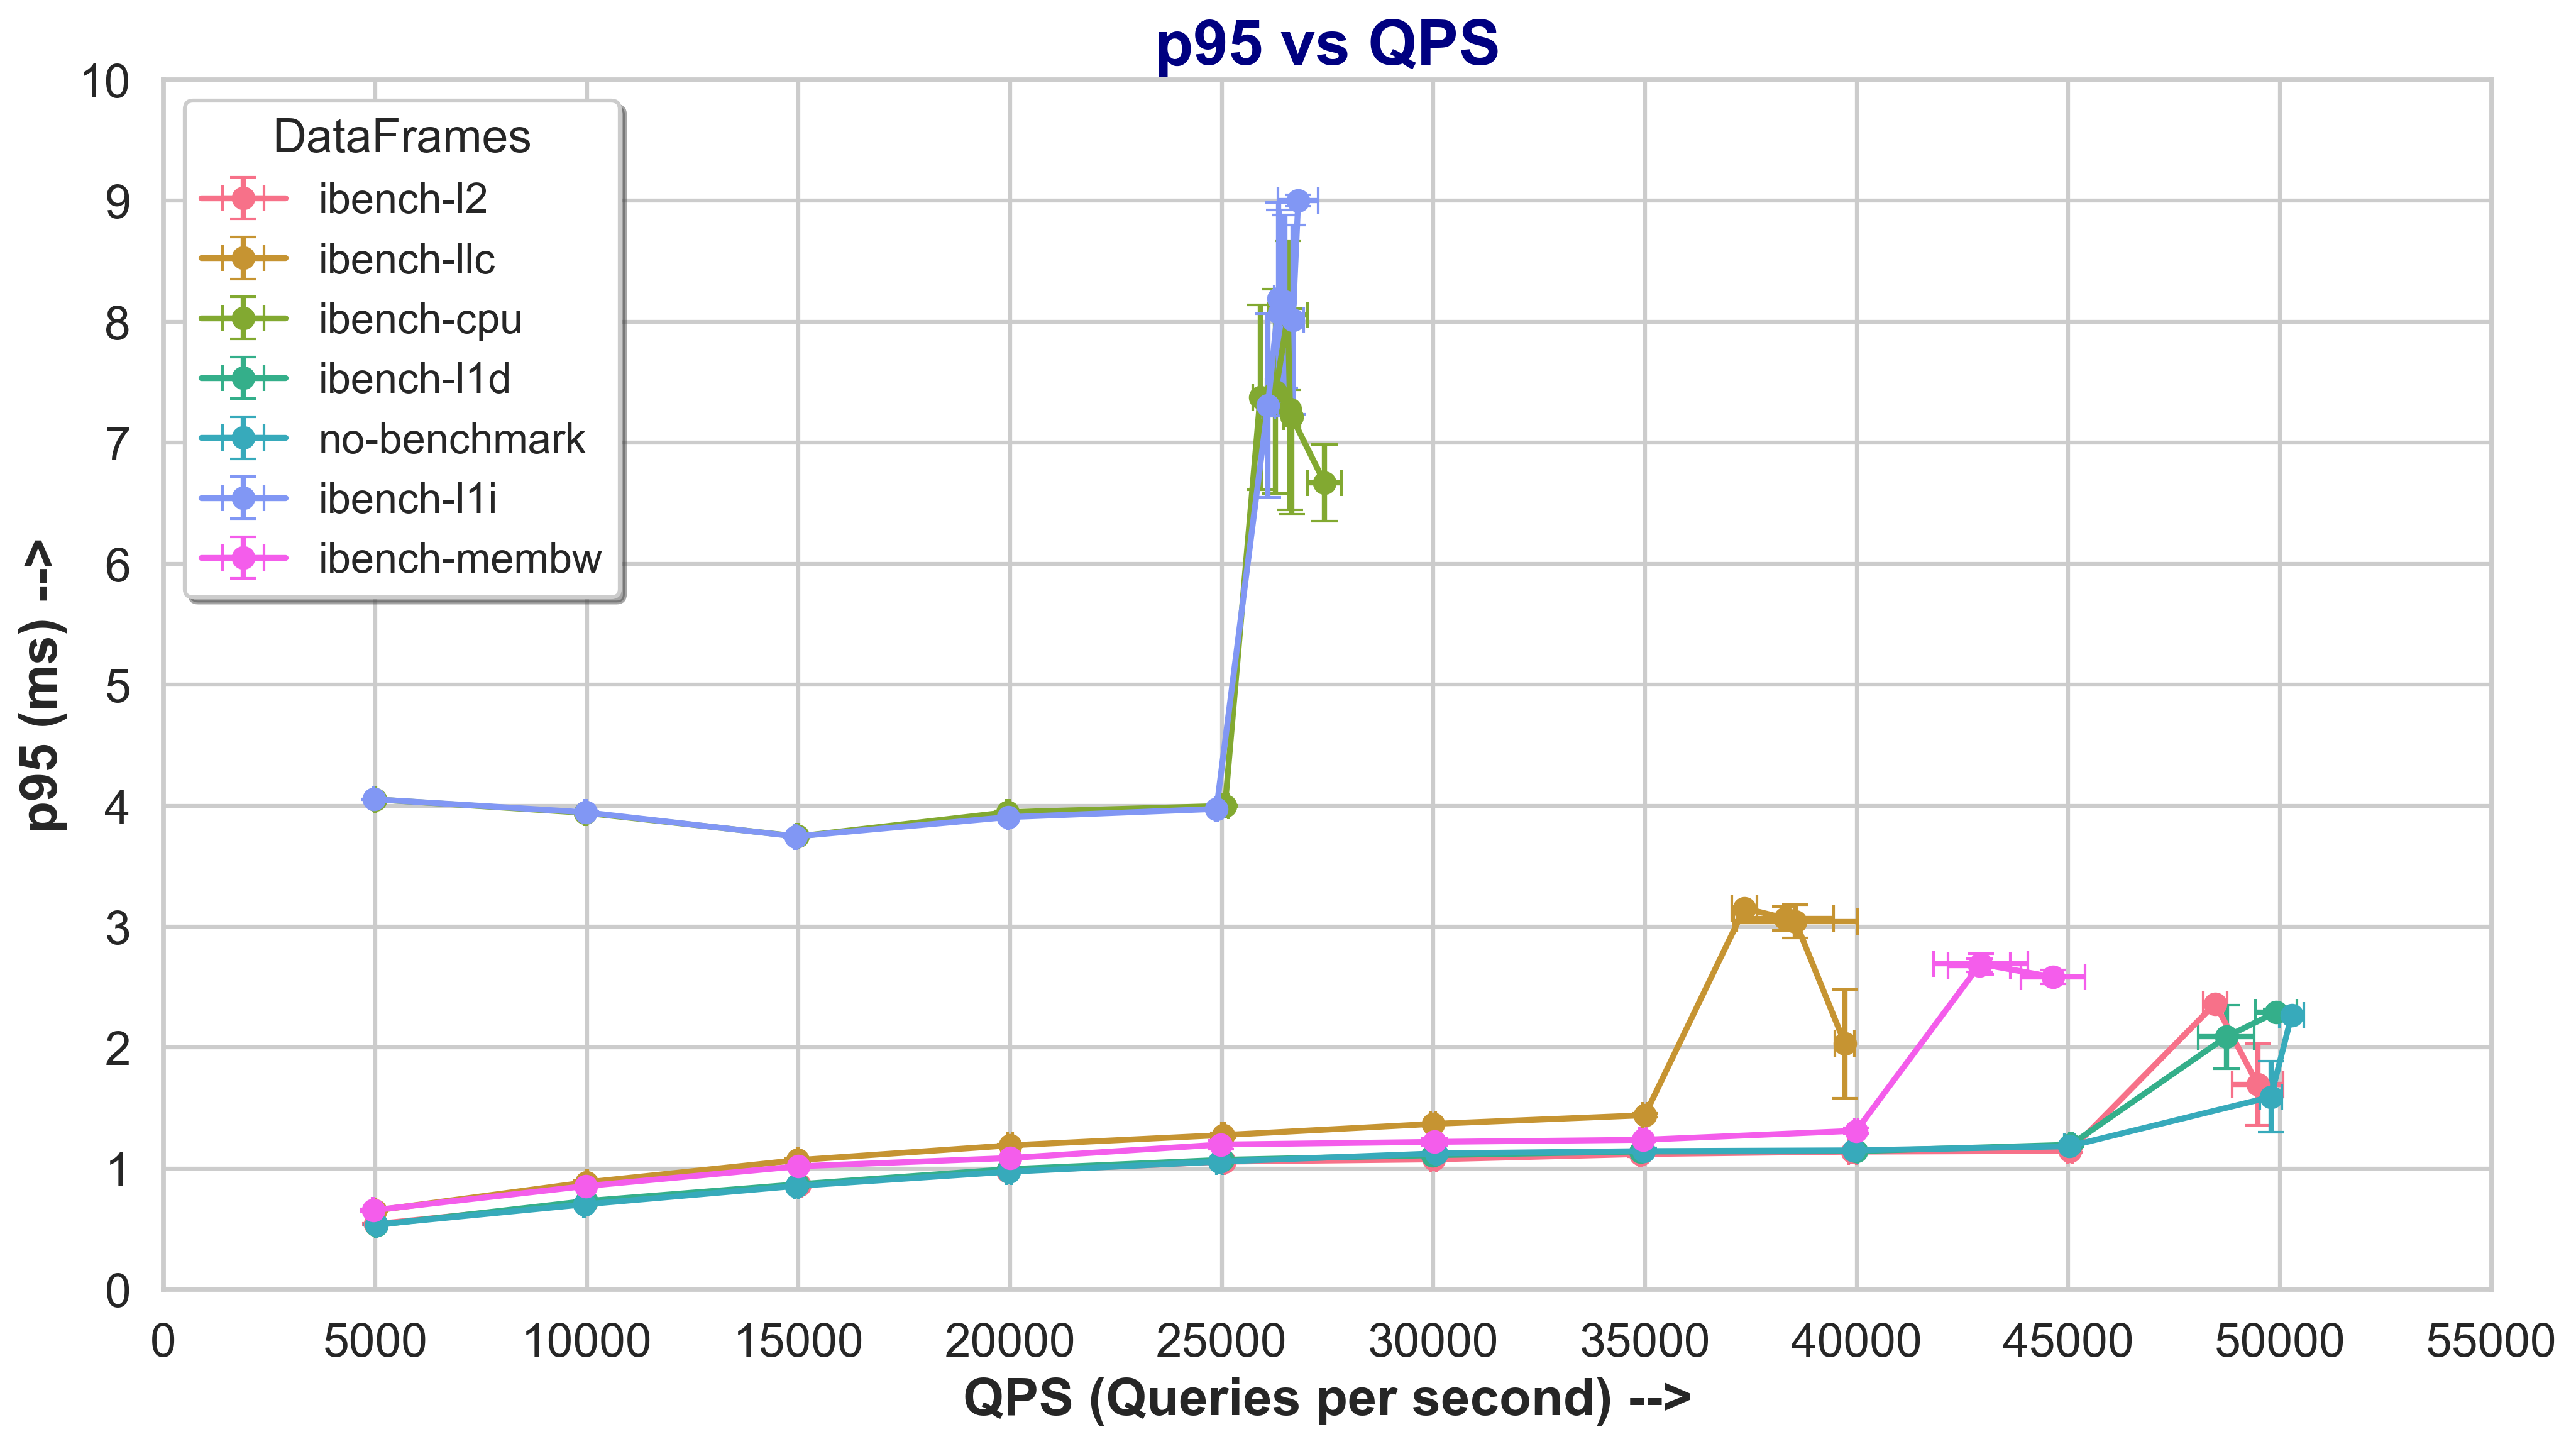

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set a theme with Seaborn for a more appealing look
sns.set_theme(context='talk', style='whitegrid')

# Define a custom color palette that's vibrant and distinct
palette = sns.color_palette("husl", len(config_data_dict))  # "husl" is a colorful palette
sns.set_palette(palette)

# Create a larger figure size for better clarity and specify DPI for higher resolution
plt.figure(figsize=(14, 8), dpi=300)

# Plot each DataFrame with enhanced aesthetics
for i, (name, df) in enumerate(config_data_dict.items()):
    sorted_df = df.sort_values(by="QPS_avg")
    plt.errorbar(sorted_df["QPS_avg"], sorted_df["p95_avg"], yerr=sorted_df["p95_sem"],
                 xerr = sorted_df["QPS_sem"], label=name, fmt='-o', elinewidth=2, capsize=5, markersize=8)

# Set plot title and labels with customized font sizes
plt.title("p95 vs QPS", fontsize=24, fontweight='bold', color='navy')
plt.xlabel("QPS (Queries per second) -->", fontsize=20, fontweight='bold')
plt.ylabel("p95 (ms) -->", fontsize=20, fontweight='bold')

# Customize tick labels for clarity and aesthetics
plt.xticks(fontsize=18, ticks=np.arange(0, 55001, 5000))
plt.yticks(fontsize=18, ticks=np.arange(0, 11, 1))  # Adjusted as per request

# Set the x and y axis limits
plt.xlim(0, 55000)
plt.ylim(0, 10)

# Enhance the legend to make it more readable
plt.legend(title='DataFrames', title_fontsize='18', fontsize=16, loc='upper left', frameon=True, framealpha=1, shadow=True)

# Tight layout for better spacing
plt.tight_layout()

# Save the figure with high quality
plt.savefig('plot_seaborn_enhanced_quality.png', dpi=300, bbox_inches='tight')

plt.show()